<a href="https://colab.research.google.com/github/shivam-kislay/Python-Codes/blob/master/ShivamKislayAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Libraries**

In [47]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow version: 2.2.0-rc2
Is Executing Eagerly? True


## **Dense Layer Models**

**Encoder**

Single Hidden Layer Encoder

In [0]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

Two Hidden Layer Encoder

In [0]:
class Encoder_two(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_two, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=(intermediate_dim / 2), activation=tf.nn.relu)
    
    def call(self, input_features):
        layer1 = self.hidden_layer(input_features)
        activation = self.hidden_layer2(layer1)
        return self.output_layer(activation)

Three Hidden layer Encoder

In [0]:
class Encoder_three(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_three, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu)
        self.hidden_layer3 = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu)
    
    def call(self, input_features):
        layer1 = self.hidden_layer(input_features)
        layer2 = self.hidden_layer2(layer1)
        activation = self.hidden_layer3(layer2)
        return self.output_layer(activation)

**Decoder**

Single Layer Decoder

In [0]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

Double Layer Decoder

In [0]:
class Decoder_two(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_two, self).__init__()
        # self.hidden_layer = tf.keras.layers.Dense(units=(intermediate_dim / 2), activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        # layer1 = self.hidden_layer(code)
        activation = self.hidden_layer2(code)
        return self.output_layer(activation)

Three layer Decoder

In [0]:
class Decoder_three(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_three, self).__init__()
        # self.hidden_layer = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu)
        self.hidden_layer3 = tf.keras.layers.Dense(units= intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        #layer1 = self.hidden_layer(code)
        layer2 = self.hidden_layer2(code)
        activation = self.hidden_layer3(layer2)
        return self.output_layer(activation)

**Auto Encoder Model**
Total of 3 dense layer models are made with 1, 2 and 3 hidden layers repectively.

Auto Encoder Model for 1 layer

In [0]:
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

Auto Encoder Model for 2 layers

In [0]:
class Autoencoder_two(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_two, self).__init__()
    self.loss = []
    self.encoder = Encoder_two(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_two(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

Auto Encoder for 3 layers

In [0]:
class Autoencoder_three(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_three, self).__init__()
    self.loss = []
    self.encoder = Encoder_three(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_three(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

**Loss Function**

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

**Forward Pass Optimization**

In [0]:
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

**Training Loop**

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

**Process Data Set**

In [16]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

11493376/11490434 [==============================] - 0s 0us/step


**Train Model**

Model with 1 layer

In [17]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 8.926347732543945
Epoch 2/100. Loss: 5.716523170471191
Epoch 3/100. Loss: 5.278569221496582
Epoch 4/100. Loss: 5.126194953918457
Epoch 5/100. Loss: 4.994088172912598
Epoch 6/100. Loss: 4.902425765991211
Epoch 7/100. Loss: 4.857032299041748
Epoch 8/100. Loss: 4.806615829467773
Epoch 9/100. Loss: 4.778065204620361
Epoch 10/100. Loss: 4.758152961730957
Epoch 11/100. Loss: 4.720773220062256
Epoch 12/100. Loss: 4.693841457366943
Epoch 13/100. Loss: 4.6855669021606445
Epoch 14/100. Loss: 4.678322792053223
Epoch 15/100. Loss: 4.659173965454102
Epoch 16/100. Loss: 4.640782356262207
Epoch 17/100. Loss: 4.6254401206970215
Epoch 18/100. Loss: 4.612016677856445
Epoch 19/100. Loss: 4.614124298095703
Epoch 20/100. Loss: 4.614327430725098
Epoch 21/100. Loss: 4.601001739501953
Epoch 22/100. Loss: 4.6217193603515625
Epoch 23/100. Loss: 4.607093334197998
Epoch 24/100. Loss: 4.587316513061523
Epoch 25/100. Loss: 4.588685512542725
Epoch 26/100. Loss: 4.558658123016357
Epoch 27/100. Loss

Model With Two Layer

In [18]:
model2 = Autoencoder_two(intermediate_dim=128, original_dim=784)
#print(model2)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model2, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 10.156967163085938
Epoch 2/100. Loss: 6.2966084480285645
Epoch 3/100. Loss: 5.63960599899292
Epoch 4/100. Loss: 5.328477382659912
Epoch 5/100. Loss: 5.109516620635986
Epoch 6/100. Loss: 4.936257362365723
Epoch 7/100. Loss: 4.739149570465088
Epoch 8/100. Loss: 4.649048805236816
Epoch 9/100. Loss: 4.5310468673706055
Epoch 10/100. Loss: 4.461276054382324
Epoch 11/100. Loss: 4.36431360244751
Epoch 12/100. Loss: 4.345788955688477
Epoch 13/100. Loss: 4.284156799316406
Epoch 14/100. Loss: 4.245282173156738
Epoch 15/100. Loss: 4.201131343841553
Epoch 16/100. Loss: 4.16905403137207
Epoch 17/100. Loss: 4.180913925170898
Epoch 18/100. Loss: 4.123317241668701
Epoch 19/100. Loss: 4.106230735778809
Epoch 20/100. Loss: 4.109165191650391
Epoch 21/100. Loss: 4.080013751983643
Epoch 22/100. Loss: 4.06414270401001
Epoch 23/100. Loss: 4.005712509155273
Epoch 24/100. Loss: 4.044200420379639
Epoch 25/100. Loss: 3.996544599533081
Epoch 26/100. Loss: 4.002429008483887
Epoch 27/100. Loss: 4.

Model With three layers

In [19]:
model3 = Autoencoder_three(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model3, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 15.603386878967285
Epoch 2/100. Loss: 8.06149959564209
Epoch 3/100. Loss: 6.9887847900390625
Epoch 4/100. Loss: 6.340830326080322
Epoch 5/100. Loss: 5.989912986755371
Epoch 6/100. Loss: 5.7162604331970215
Epoch 7/100. Loss: 5.467057228088379
Epoch 8/100. Loss: 5.2597270011901855
Epoch 9/100. Loss: 5.159937858581543
Epoch 10/100. Loss: 5.030482769012451
Epoch 11/100. Loss: 4.939113616943359
Epoch 12/100. Loss: 4.842452049255371
Epoch 13/100. Loss: 4.743095874786377
Epoch 14/100. Loss: 4.704596996307373
Epoch 15/100. Loss: 4.589630126953125
Epoch 16/100. Loss: 4.558114528656006
Epoch 17/100. Loss: 4.5267229080200195
Epoch 18/100. Loss: 4.415216445922852
Epoch 19/100. Loss: 4.335662364959717
Epoch 20/100. Loss: 4.372834205627441
Epoch 21/100. Loss: 4.302768230438232
Epoch 22/100. Loss: 4.3094611167907715
Epoch 23/100. Loss: 4.307394981384277
Epoch 24/100. Loss: 4.247610092163086
Epoch 25/100. Loss: 4.157982349395752
Epoch 26/100. Loss: 4.187270641326904
Epoch 27/100. Lo

**Predictions**

Predicton for 1 hidden layer model

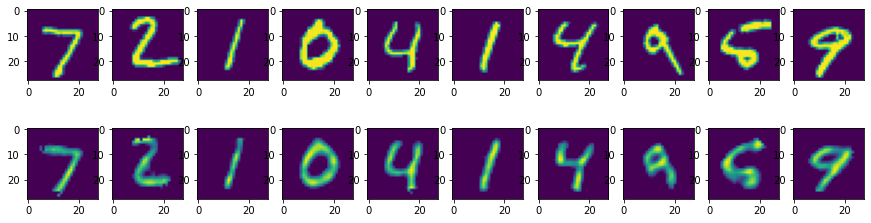

In [20]:
out1 = model.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out1[i].reshape(28,28))

plt.show()

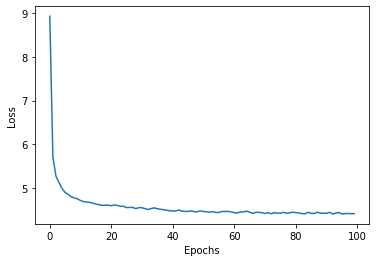

In [21]:
plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Prediction for 2 hidden layer model

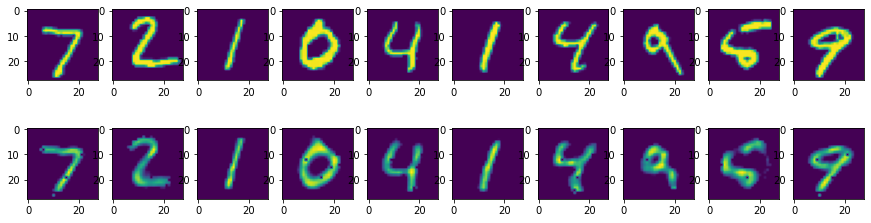

In [22]:
out2 = model2.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out2[i].reshape(28,28))

plt.show()

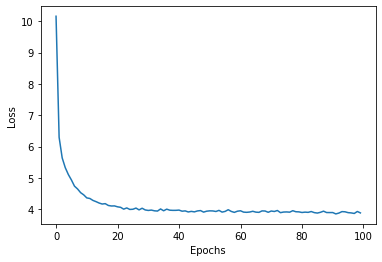

In [23]:
plt.plot(range(100), model2.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Predictions for 3 hidden layer Model

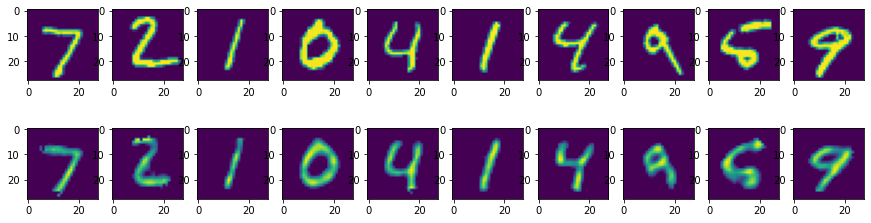

In [24]:
out2 = model.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out2[i].reshape(28,28))

plt.show()

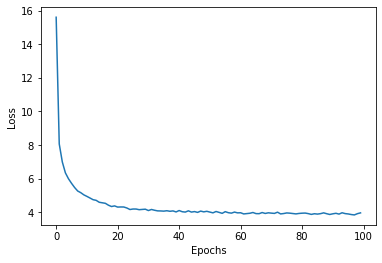

In [25]:
plt.plot(range(100), model3.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

From the Model Loss and Predictions, it can be noticed that the model with 3 hidden layer is performing the best. Since we are reducing the size of the layer. Since the dimensions decrease the data loss while decoding is also more. Thus, accuracy is better for 1 hidden layer model in this case.

## **CNN models**

In [48]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 4, 4, 8)           0   

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 6s 14ms/step - loss: 0.6975 - val_loss: 0.6958
Epoch 2/50
469/469 [==============================] - 6s 13ms/step - loss: 0.6940 - val_loss: 0.6921
Epoch 3/50
469/469 [==============================] - 6s 14ms/step - loss: 0.6900 - val_loss: 0.6878
Epoch 4/50
469/469 [==============================] - 7s 14ms/step - loss: 0.6847 - val_loss: 0.6813
Epoch 5/50
469/469 [==============================] - 6s 14ms/step - loss: 0.6757 - val_loss: 0.6685
Epoch 6/50
469/469 [==============================] - 6s 13ms/step - loss: 0.6537 - val_loss: 0.6319
Epoch 7/50
469/469 [==============================] - 6s 13ms/step - loss: 0.5800 - val_loss: 0.5179
Epoch 8/50
469/469 [==============================] - 6s 13ms/step - loss: 0.4901 - val_loss: 0.4840
Epoch 9/50
469/469 [==============================] - 6s 13ms/step - loss: 0.4759 - val_loss: 0.4756
Epoch 10/50
469/469 [==============================] - 6s 13ms/step - loss: 0.4677 - val_lo

In [0]:
out_img = autoencoder.predict(x_test)

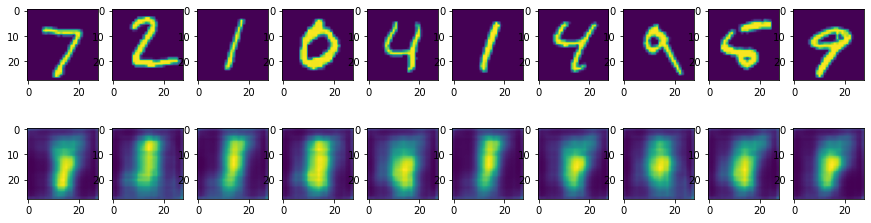

In [33]:
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out_img[i].reshape(28,28))

plt.show()

Complex CNN

In [46]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
#(2,2,8)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 4, 4, 8)           0   

In [42]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/10
469/469 [==============================] - 8s 17ms/step - loss: 0.4443 - val_loss: 0.3578
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2876 - val_loss: 0.2670
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2636 - val_loss: 0.2606
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2583 - val_loss: 0.2559
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2538 - val_loss: 0.2515
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2489 - val_loss: 0.2463
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2438 - val_loss: 0.2415
Epoch 8/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2396 - val_loss: 0.2385
Epoch 9/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2366 - val_loss: 0.2365
Epoch 10/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2330 - val_lo

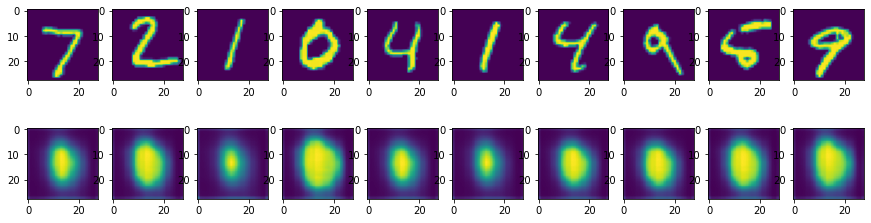

In [40]:
out_img2 = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out_img2[i].reshape(28,28))

plt.show()